In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [59]:
train = pd.read_csv('Data/train.csv')

train = train.drop("id", axis = 1)

defect_counts = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].sum(axis=1)
train = train[defect_counts==1]

train['target'] = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].apply(lambda row: row.idxmax(), axis=1)
train = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"],axis = 1)

label_map = {'Pastry': 0, 'Z_Scratch': 1, 'K_Scatch': 2, 'Stains': 3, 'Dirtiness': 4, 'Bumps': 5, 'Other_Faults': 6}
train['target'] = train['target'].map(label_map)

In [60]:
train['_Aspect_Ratio'] = (train['X_Maximum'] - train['X_Minimum']) / (abs(train['Y_Maximum'] - train['Y_Minimum']) + 1)
train['_Area_Perimeter_Ratio_X'] = train['Pixels_Areas'] / train['X_Perimeter']
train['_Area_Perimeter_Ratio_Y'] = train['Pixels_Areas'] / train['Y_Perimeter']
train['_Compactness_X'] = train['Pixels_Areas'] / (train['X_Perimeter'] ** 2)
train['_Compactness_Y'] = train['Pixels_Areas'] / (train['Y_Perimeter'] ** 2)
train['_Color_Range'] = train['Maximum_of_Luminosity'] - train['Minimum_of_Luminosity']
train['_Spatial_Distribution_Index'] = train['Edges_Index'] + train['Empty_Index'] + train['Square_Index'] + train['Outside_X_Index'] + train['Edges_X_Index'] + train['Edges_Y_Index'] + train['Outside_Global_Index']
train['_Log_Area_Perimeter_Ratio'] = train['LogOfAreas'] / (train['Log_X_Index'] + train['Log_Y_Index'])
train['_Normalized_Luminosity_Index'] = train['Luminosity_Index'] / train['Pixels_Areas']
train['_Thickness_Steel_Type'] = train['Steel_Plate_Thickness'] * (train['TypeOfSteel_A300'] + train['TypeOfSteel_A400'])
train['_Edge_to_Area_Ratio'] = train['Edges_Index'] / train['Pixels_Areas']


In [61]:
train['TypeOfSteel'] = train.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
train = train.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)
train.dropna(inplace=True)

In [62]:
X = train.drop("target", axis=1)
y = train["target"]

In [63]:
import optuna
import xgboost as xgb
from sklearn.datasets import load_iris  # Example dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

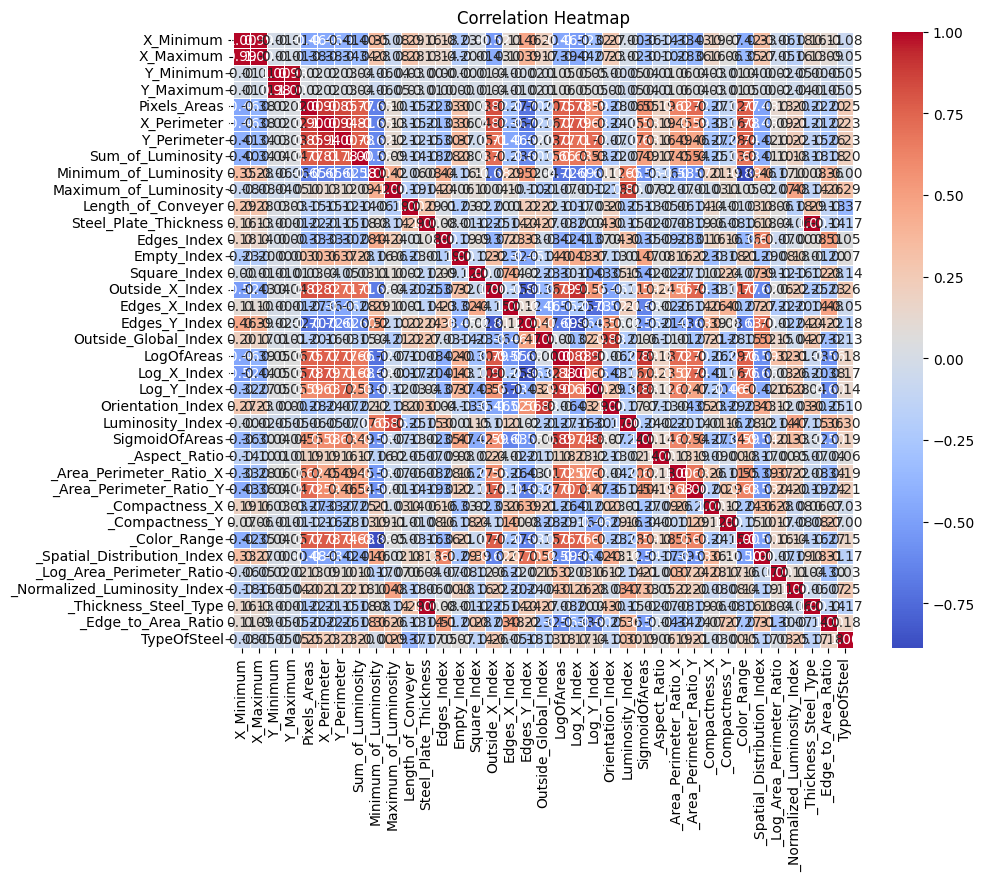

In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'df' with float values
# Example: df = pd.DataFrame(...)

# 1. Calculate the correlation matrix
corr_matrix = X_train.corr()

# 2. Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))  # You can adjust the figure size as needed
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# 3. Show the plot
plt.title('Correlation Heatmap')
plt.show()


In [71]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with float features

# 1. Compute the correlation matrix
corr_matrix = X_train.corr()

# 2. Set a threshold for high correlation (e.g., > 0.8 or < -0.8)
threshold = 0.8

# 3. Find pairs of features with correlation greater than the threshold
high_corr_pairs = np.where((corr_matrix > threshold) | (corr_matrix < -threshold))

# 4. Extract the pairs, avoiding self-correlation
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_pairs) if x != y]

# 5. Filter out duplicate pairs (since correlation matrix is symmetric)
unique_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# 6. Display the high correlation pairs
print("Highly correlated features (correlation coefficient > 0.8 or < -0.8):")
for pair in unique_corr_pairs:
    print(f"{pair[0]} and {pair[1]}: correlation = {corr_matrix.loc[pair[0], pair[1]]:.2f}")



Highly correlated features (correlation coefficient > 0.8 or < -0.8):
Y_Maximum and Y_Minimum: correlation = 0.98
Minimum_of_Luminosity and _Color_Range: correlation = -0.89
Pixels_Areas and Y_Perimeter: correlation = 0.85
X_Perimeter and Y_Perimeter: correlation = 0.94
Outside_X_Index and Pixels_Areas: correlation = 0.82
Orientation_Index and Outside_Global_Index: correlation = 0.88
LogOfAreas and Log_X_Index: correlation = 0.88
Edges_Y_Index and Log_X_Index: correlation = -0.86
Pixels_Areas and X_Perimeter: correlation = 0.90
Log_X_Index and Outside_X_Index: correlation = 0.91
Outside_X_Index and X_Perimeter: correlation = 0.82
Edges_Y_Index and Outside_X_Index: correlation = -0.81
LogOfAreas and SigmoidOfAreas: correlation = 0.89
X_Maximum and X_Minimum: correlation = 0.99
LogOfAreas and Log_Y_Index: correlation = 0.90
Log_Y_Index and SigmoidOfAreas: correlation = 0.88
Luminosity_Index and Maximum_of_Luminosity: correlation = 0.86
Sum_of_Luminosity and X_Perimeter: correlation = 0.8

In [73]:
import pandas as pd
import numpy as np

# Assuming 'df' is your DataFrame with float features

# 1. Compute the correlation matrix
corr_matrix = X_train.corr()

# 2. Set a threshold for high correlation (e.g., > 0.8 or < -0.8)
threshold = 0.8

# 3. Find pairs of features with correlation greater than the threshold
high_corr_pairs = np.where((corr_matrix > threshold) | (corr_matrix < -threshold))

# 4. Extract the pairs, avoiding self-correlation
high_corr_pairs = [(corr_matrix.index[x], corr_matrix.columns[y]) 
                   for x, y in zip(*high_corr_pairs) if x != y]

# 5. Filter out duplicate pairs (since correlation matrix is symmetric)
unique_corr_pairs = set(tuple(sorted(pair)) for pair in high_corr_pairs)

# 6. Create a list to count correlations for each feature
feature_correlation_counts = {}

# 7. Count how many times each feature is involved in a high-correlation pair
for pair in unique_corr_pairs:
    feature_correlation_counts[pair[0]] = feature_correlation_counts.get(pair[0], 0) + 1
    feature_correlation_counts[pair[1]] = feature_correlation_counts.get(pair[1], 0) + 1

# 8. Sort features by the number of high correlations
features_to_remove = sorted(feature_correlation_counts, key=feature_correlation_counts.get, reverse=True)

# 9. Display features sorted by their correlation involvement
print("Features to consider removing (sorted by involvement in high-correlation pairs):")
for feature in features_to_remove:
    print(f"{feature}: involved in {feature_correlation_counts[feature]} high-correlation pairs")


Features to consider removing (sorted by involvement in high-correlation pairs):
X_Perimeter: involved in 4 high-correlation pairs
Outside_X_Index: involved in 4 high-correlation pairs
Pixels_Areas: involved in 3 high-correlation pairs
LogOfAreas: involved in 3 high-correlation pairs
Log_X_Index: involved in 3 high-correlation pairs
Y_Perimeter: involved in 2 high-correlation pairs
Edges_Y_Index: involved in 2 high-correlation pairs
SigmoidOfAreas: involved in 2 high-correlation pairs
Log_Y_Index: involved in 2 high-correlation pairs
Y_Maximum: involved in 1 high-correlation pairs
Y_Minimum: involved in 1 high-correlation pairs
Minimum_of_Luminosity: involved in 1 high-correlation pairs
_Color_Range: involved in 1 high-correlation pairs
Orientation_Index: involved in 1 high-correlation pairs
Outside_Global_Index: involved in 1 high-correlation pairs
X_Maximum: involved in 1 high-correlation pairs
X_Minimum: involved in 1 high-correlation pairs
Luminosity_Index: involved in 1 high-corre

In [75]:
high_correlated_features = ['Y_Minimum', '_Color_Range', 'Pixels_Areas', 'X_Perimeter', 'Outside_X_Index', 'Orientation_Index', 'LogOfAreas', 'Log_X_Index', 'X_Maximum', 'SigmoidOfAreas', 'Luminosity_Index', 'Steel_Plate_Thickness']

In [ ]:
X_train = X_train.drop(high_correlated_features, axis=1)
X_val = X_val.drop(high_correlated_features, axis=1)
X_test = X_test.drop(high_correlated_features, axis=1)

In [81]:
def objective(trial):
    # Define the search space for XGBoost parameters
    param = {
        'objective': 'multi:softprob',  # Multiclass classification
        'num_class': 7,  # Change according to your number of classes
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log = True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log = True),
        'eta': trial.suggest_float('eta', 1e-8, 1.0, log = True),
        'max_depth': trial.suggest_int('max_depth', 2, 15),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-3, 10, log=True),
        'gamma': trial.suggest_float('gamma', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'colsample_bylevel': trial.suggest_float('colsample_bylevel', 0.5, 1.0),
        'colsample_bynode': trial.suggest_float('colsample_bynode', 0.5, 1.0),
        'n_estimators': trial.suggest_int('n_estimators', 50, 1000),
        'device': 'cuda',  # Use GPU acceleration
    }

    model = xgb.XGBClassifier(**param)
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_val)

    # Compute accuracy (you can also use log loss or other metrics)
    accuracy = accuracy_score(y_val, y_pred)
    
    return accuracy

In [83]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)  # n_trials and timeout can be adjusted

[I 2024-11-09 13:30:39,125] A new study created in memory with name: no-name-3b5ecc07-e56b-49af-8a9f-906c5aed2cb3
[I 2024-11-09 13:30:53,481] Trial 0 finished with value: 0.5584297708191513 and parameters: {'lambda': 1.1315180860488104e-08, 'alpha': 5.367725741201291e-07, 'eta': 0.3223963873625594, 'max_depth': 13, 'min_child_weight': 0.6252408410175826, 'gamma': 5.355719360889721e-05, 'subsample': 0.5740453208583742, 'colsample_bytree': 0.6602462837295653, 'colsample_bylevel': 0.8500402953399357, 'colsample_bynode': 0.8041322044308268, 'n_estimators': 87}. Best is trial 0 with value: 0.5584297708191513.
[I 2024-11-09 13:32:58,077] Trial 1 finished with value: 0.5663716814159292 and parameters: {'lambda': 4.030449235573873e-05, 'alpha': 0.0011662007384718304, 'eta': 1.4544755216359505e-05, 'max_depth': 12, 'min_child_weight': 0.17138331068765816, 'gamma': 0.00011304577839156247, 'subsample': 0.9720007392710988, 'colsample_bytree': 0.6456313734363025, 'colsample_bylevel': 0.848143296307

KeyboardInterrupt: 

In [ ]:
# Output the best trial
print("Best trial:")
trial = study.best_trial
print("  Value: ", trial.value)
print("  Params: ")
for key, value in trial.params.items():
    print(f"    {key}: {value}")